In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
plt.rcParams['pdf.fonttype']=42 #ensures true fonte types are embedded in the pdf 
plt.rcParams['ps.fonttype']=42 # Applies the same setting for post script output

In [2]:

subgroup_FPR ='./FPR/SubGroup_FPR'
os.makedirs(os.path.dirname(subgroup_FPR), exist_ok=True)


In [3]:
result_sex_df=pd.read_csv(subgroup_FPR+"/Subgroup_FNR_FPR_Sex.csv")
result_sex_df

,Unnamed: 0,sex,#,FPR,CI_FPR,FNR,CI_FNR
0,0,M,9579.0,0.059,0.004,0.193,0.013
1,1,F,6672.0,0.073,0.006,0.202,0.011


In [4]:
result_age_df = pd.read_csv(subgroup_FPR+"/Subgroup_FNR_FPR_Age.csv")

In [5]:
result_race_df =pd.read_csv(subgroup_FPR+"/Subgroup_FNR_FPR_Race.csv")

In [6]:
FP5_sex = pd.read_csv("./CheXpert_Baseline_FPR/Seed_32/FPR2_FNR_NF_sex.csv")
FP4_sex = pd.read_csv("./CheXpert_Baseline_FPR/Seed_40/FPR1_FNR_NF_sex.csv")
FP3_sex = pd.read_csv("./CheXpert_Baseline_FPR/Seed_56/FPR4_FNR_NF_sex.csv")
FP2_sex = pd.read_csv("./CheXpert_Baseline_FPR/Seed_60/FPR3_FNR_NF_sex.csv")
FP1_sex = pd.read_csv("./CheXpert_Baseline_FPR/Seed_90/FPR5_FNR_NF_sex.csv")

FP_sex = pd.concat([FP1_sex,FP2_sex, FP3_sex,FP4_sex, FP5_sex])
F_sex_df = FP_sex.describe()


In [7]:
FP_sex = F_sex_df.loc['mean':'std', :].reset_index()

FP_sex = FP_sex.drop(columns=["Unnamed: 0"])[['index', 'FPR_M', 'FPR_F']]

FP_sex.to_csv('./CheXpert_Baseline_FPR/baseline_sex_fpr.csv',index=False)

In [8]:
FP_sex

,index,FPR_M,FPR_F
0,mean,0.093400,0.100800
1,std,0.006309,0.006419


In [9]:
Baseline_FPR_Race=pd.read_csv("./CheXpert_Baseline_FPR/Subgroup_FPR_Race.csv")

In [10]:
FP5_age = pd.read_csv("./CheXpert_Baseline_FPR/Seed_32/FPR2_FNR_NF_age.csv")
FP4_age= pd.read_csv("./CheXpert_Baseline_FPR/Seed_40/FPR1_FNR_NF_age.csv")
FP3_age = pd.read_csv("./CheXpert_Baseline_FPR/Seed_56/FPR4_FNR_NF_age.csv")
FP2_age = pd.read_csv("./CheXpert_Baseline_FPR/Seed_60/FPR3_FNR_NF_age.csv")
FP1_age = pd.read_csv("./CheXpert_Baseline_FPR/Seed_90/FPR5_FNR_NF_age.csv")
FP_age =pd.concat([FP1_age,FP2_age, FP3_age,FP4_age, FP5_age])
F_age_df = FP_age.describe()



In [11]:
F_age_df

,Unnamed: 0,#40-60,FPR_40-60,FNR_40-60,#60-80,FPR_60-80,FNR_60-80,#20-40,FPR_20-40,FNR_20-40,#80-,FPR_80-,FNR_80-,#0-20,FPR_0-20,FNR_0-20
count,5.0,5.0,5.000000,5.000000,5.0,5.000000,5.000000,5.0,5.000000,5.000000,5.0,5.000000,5.000000,5.0,5.000000,5.000000
mean,0.0,5950.0,0.134400,0.267400,7990.0,0.069000,0.496800,2337.0,0.205600,0.164000,3529.0,0.019000,0.767600,185.0,0.164200,0.281200
std,0.0,0.0,0.007668,0.017785,0.0,0.005745,0.020142,0.0,0.011908,0.015748,0.0,0.004183,0.051916,0.0,0.021324,0.042933
min,0.0,5950.0,0.124000,0.244000,7990.0,0.061000,0.470000,2337.0,0.193000,0.146000,3529.0,0.014000,0.699000,185.0,0.146000,0.214000
25%,0.0,5950.0,0.132000,0.257000,7990.0,0.066000,0.482000,2337.0,0.197000,0.150000,3529.0,0.015000,0.750000,185.0,0.151000,0.262000
50%,0.0,5950.0,0.132000,0.267000,7990.0,0.070000,0.505000,2337.0,0.204000,0.166000,3529.0,0.021000,0.757000,185.0,0.151000,0.310000
75%,0.0,5950.0,0.142000,0.281000,7990.0,0.072000,0.508000,2337.0,0.211000,0.176000,3529.0,0.022000,0.794000,185.0,0.178000,0.310000
max,0.0,5950.0,0.142000,0.288000,7990.0,0.076000,0.519000,2337.0,0.223000,0.182000,3529.0,0.023000,0.838000,185.0,0.195000,0.310000


In [12]:
FP_age = F_age_df.loc['mean':'std', :].reset_index()

FP_age = FP_age.drop(columns=["Unnamed: 0"])[['index', 'FPR_0-20', 'FPR_20-40','FPR_40-60','FPR_60-80','FPR_80-']]

FP_age.to_csv('./CheXpert_Baseline_FPR/baseline_age_fpr.csv',index=False)

In [13]:
# Define custom legend handles
legend_patches = [
    mpatches.Patch(color='gray', label='Baseline(Image)'),
    mpatches.Patch(color='green', label='CXR_Emb')
]

FPR SEX : [0.0934, 0.1008]
FPR AGE : [0.018999999999999996, 0.069, 0.13440000000000002, 0.2056, 0.1642]


C:\Users\gebre\AppData\Local\Temp\ipykernel_12232\2283762847.py:145: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels,fontsize = fontsize,fontname='Times New Roman')


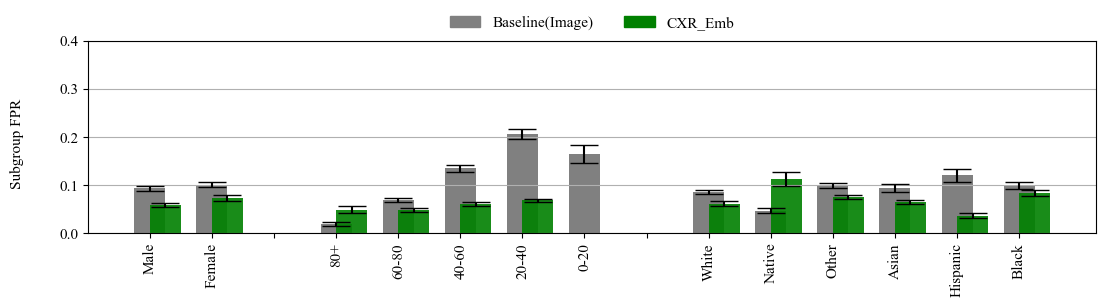

In [14]:
fig, ax = plt.subplots(figsize=(13,2.5))
fontsize = 11

# ========================Results are calculated FPR_FNR_NF_Confidence_CheXpert.ipynb ================================


# =================================SEX FPR========================================================

#-----------------------------Baseline Sex FPR------------------------------------------------------------------

sex = [ 'Male', 'Female' ]
sex_pos = np.arange(len(sex))

FPR = [F_sex_df.loc['mean']['FPR_M'],   F_sex_df.loc['mean']['FPR_F']]

print(f'FPR SEX : {FPR}')


CI = 1.96 * F_sex_df.loc['std'] / np.sqrt(5)
error = [CI.loc['FPR_M'] ,CI.loc['FPR_F'] ]

ax.bar(sex_pos, FPR, yerr=error, align='center', alpha=1, ecolor='black', capsize=10, color=['gray'],width=0.5)


#-----------------------------Embeding Sex FPR--------------------------------------

FPR = [
    result_sex_df.loc[result_sex_df['sex']=='M','FPR'].tolist()[0] ,
    result_sex_df.loc[result_sex_df['sex']=='F','FPR'].tolist()[0]
    ]

error = [result_sex_df.loc[result_sex_df['sex']=='M','CI_FPR'].tolist()[0] ,
       result_sex_df.loc[result_sex_df['sex']=='F','CI_FPR'].tolist()[0]]

ax.bar(sex_pos, FPR, yerr=error, align='edge', alpha=0.9, ecolor='black', capsize=10, color=['green'],width=0.5)


#================================================AGE FPR==============================================

# -------------------------------Baseline Age FPR ---------------------------------------------

ages = [ '80-', '60-80', '40-60', '20-40', '0-20']
ages_pos = np.arange(3,len(ages)+3)
FPR = [F_age_df.loc['mean']['FPR_80-'],  F_age_df.loc['mean']['FPR_60-80'],
       F_age_df.loc['mean']['FPR_40-60'],F_age_df.loc['mean']['FPR_20-40'],
       F_age_df.loc['mean']['FPR_0-20']]

CI = 1.96 * F_age_df.loc['std'] / np.sqrt(5)
error = [CI.loc['FPR_80-'], CI.loc['FPR_60-80'],
         CI.loc['FPR_40-60'],CI.loc['FPR_20-40'],
         CI.loc['FPR_0-20']]
ax.bar(ages_pos, FPR, yerr=error, align='center', alpha=1, ecolor='black', capsize=10, color=['gray'],width=0.5)#

print(f'FPR AGE : {FPR}')


# -------------------------------Embedding Age FPR ---------------------------------------------
ages = [ '80+', '60-80', '40-60', '20-40', '0-20']
# This values are calculated in FPR_FNR_NF_Confidence.ipynb
FPR = [result_age_df.loc[result_age_df['Age']=='80+','FPR'].tolist()[0],
       result_age_df.loc[result_age_df['Age']=='60-80','FPR'].tolist()[0],
       result_age_df.loc[result_age_df['Age']=='40-60','FPR'].tolist()[0],
       result_age_df.loc[result_age_df['Age']=='20-40','FPR'].tolist()[0],
       np.NAN
    #    result_age_df.loc[result_age_df['Age']=='0-20','FPR'].tolist()[0]
       ]

error = [result_age_df.loc[result_age_df['Age']=='80+','CI_FPR'].tolist()[0],
       result_age_df.loc[result_age_df['Age']=='60-80','CI_FPR'].tolist()[0],
       result_age_df.loc[result_age_df['Age']=='40-60','CI_FPR'].tolist()[0],
       result_age_df.loc[result_age_df['Age']=='20-40','CI_FPR'].tolist()[0],
       np.NAN
        # result_age_df.loc[result_age_df['Age']=='0-20','CI_FPR'].tolist()[0]
         ]

ax.bar(ages_pos, FPR, yerr=error, align='edge', alpha=0.9, ecolor='black', capsize=10, color=['green'],width=0.5)

# Set the x-axis ticks and labels
# ======================================== Race ==============================================

# -------------------------------Baseline Race FPR ---------------------------------------------
races = [ 'WHITE', 'NATIVE', 'OTHER', 'ASIAN', 'HIPANIC','BLACK']
race_pos = np.arange(9,len(races)+9)

FPR = [
    Baseline_FPR_Race.loc[Baseline_FPR_Race['Race']=='White','FPR'].tolist()[0],
    Baseline_FPR_Race.loc[Baseline_FPR_Race['Race']=='American','FPR'].tolist()[0],
    Baseline_FPR_Race.loc[Baseline_FPR_Race['Race']=='Other','FPR'].tolist()[0],
    Baseline_FPR_Race.loc[Baseline_FPR_Race['Race']=='Asian','FPR'].tolist()[0],
  
    Baseline_FPR_Race.loc[Baseline_FPR_Race['Race']=='Hisp','FPR'].tolist()[0],
    
    Baseline_FPR_Race.loc[Baseline_FPR_Race['Race']=='Black','FPR'].tolist()[0]
]

error = [
    Baseline_FPR_Race.loc[Baseline_FPR_Race['Race']=='White','CI_FPR'].tolist()[0],
    Baseline_FPR_Race.loc[Baseline_FPR_Race['Race']=='American','CI_FPR'].tolist()[0],
    Baseline_FPR_Race.loc[Baseline_FPR_Race['Race']=='Other','CI_FPR'].tolist()[0],
    Baseline_FPR_Race.loc[Baseline_FPR_Race['Race']=='Asian','CI_FPR'].tolist()[0],
    Baseline_FPR_Race.loc[Baseline_FPR_Race['Race']=='Hisp','CI_FPR'].tolist()[0],
    
    Baseline_FPR_Race.loc[Baseline_FPR_Race['Race']=='Black','CI_FPR'].tolist()[0]
]

ax.bar(race_pos, FPR, yerr=error, align='center', alpha=1, ecolor='black', capsize=10, color=['gray'],width=0.5)

FPR = [
    result_race_df.loc[result_race_df['Race']=='White','FPR'].tolist()[0],
    # np.NAN,
    result_race_df.loc[result_race_df['Race']=='American','FPR'].tolist()[0],
    result_race_df.loc[result_race_df['Race']=='Other','FPR'].tolist()[0],
    result_race_df.loc[result_race_df['Race']=='Asian','FPR'].tolist()[0],
    # np.NAN,
    result_race_df.loc[result_race_df['Race']=='Hisp','FPR'].tolist()[0],
    # np.NAN,
    result_race_df.loc[result_race_df['Race']=='Black','FPR'].tolist()[0]
]

error = [
    result_race_df.loc[result_race_df['Race']=='White','CI_FPR'].tolist()[0],

    # np.NAN,

    result_race_df.loc[result_race_df['Race']=='American','CI_FPR'].tolist()[0],
    result_race_df.loc[result_race_df['Race']=='Other','CI_FPR'].tolist()[0],
    result_race_df.loc[result_race_df['Race']=='Asian','CI_FPR'].tolist()[0],
    # np.NAN,
    result_race_df.loc[result_race_df['Race']=='Hisp','CI_FPR'].tolist()[0],
    # np.NAN,
    result_race_df.loc[result_race_df['Race']=='Black','CI_FPR'].tolist()[0]
]

ax.bar(race_pos, FPR, yerr=error, align='edge', alpha=0.9, ecolor='black', capsize=10, color=['green'],width=0.5)

labels = ['Male', 'Female',"",'80+', '60-80', '40-60', '20-40', '0-20',"",'White', 'Native', 'Other', 'Asian',
          'Hispanic','Black']
x_pos = np.arange(len(labels))

y_labels = ['0.0', '0.1', '0.2','0.3','0.4']

# ax.set_ylabel('Subgroup FPR',fontsize = fontsize)
ax.set_xticks(x_pos)
ax.set_xticklabels(labels,fontsize = fontsize, rotation=90,fontname='Times New Roman')
ax.set_yticklabels(y_labels,fontsize = fontsize,fontname='Times New Roman')


ax.yaxis.grid(True)
ax.set_ylim(top=0.4)

# Adding the legend at the top center side
# Create the legend
legend = ax.legend(handles=legend_patches, loc="upper center",
                   bbox_to_anchor=(0.5, 1.2), ncol=3, fontsize=fontsize, frameon=False)
# Manually set font for all legend text
for text in legend.get_texts():
    text.set_fontname('Times New Roman')
    

# Add a title to the Figure
fig.suptitle('Subgroup FPR',rotation=90,x=0.07,y=0.65,fontsize=fontsize,fontname='Times New Roman')


plt.savefig('./FPR/Sub_group_FPR_CXP.pdf',bbox_inches='tight')


### Two group intersection

In [15]:
# Fixing random state for reproducibility
np.random.seed(19680801)

In [16]:

two_group_FPR = './FPR/Two_Group_Intersection_FPR'

In [17]:
FP_RaceSex_df = pd.read_csv(two_group_FPR+"/Inter_RaceSex.csv")
FP_RaceAge_df = pd.read_csv(two_group_FPR+"/Inter_RaceAge.csv")
FP_AgeSex_df = pd.read_csv(two_group_FPR+"/Inter_AgeSex.csv")


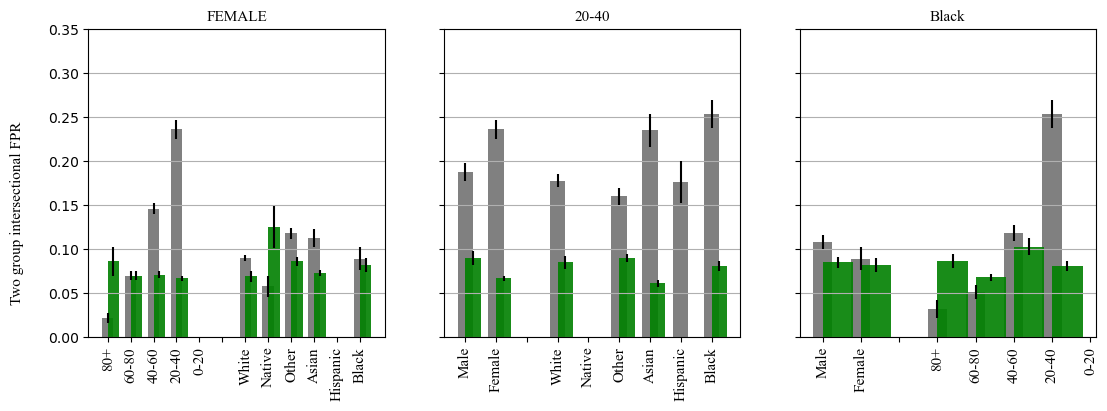

In [18]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 4), sharey=True)
plt.rcdefaults()
fontsize = 11

# ========================Results are calculated FPR_FNR_NF_Confidence_CheXpert.ipynb ===============================

# ===========================SEX Vs All other groups FPR ====================================================

#---------------------------Baseline FPR(sex vs other groups)--------------------------------------
FPR_AgeSex_Baseline=pd.read_csv("./CheXpert_Baseline_FPR/Inter_FPFN_AgeSex.csv")
FPR_RaceSex_Basline=pd.read_csv("./CheXpert_Baseline_FPR/Inter_RaceSex.csv")


sex = ('80-', '60-80', '40-60', '20-40','0-20','', 'White','Native','Other','Asian','Hispanic', 'Black')
sex_pos = np.arange(len(sex))

FPR =   (FPR_AgeSex_Baseline.loc[FPR_AgeSex_Baseline['Age']=='80-','FPR_F'].tolist()[0],
         FPR_AgeSex_Baseline.loc[FPR_AgeSex_Baseline['Age']=='60-80','FPR_F'].tolist()[0],
         FPR_AgeSex_Baseline.loc[FPR_AgeSex_Baseline['Age']=='40-60','FPR_F'].tolist()[0],
         FPR_AgeSex_Baseline.loc[FPR_AgeSex_Baseline['Age']=='20-40','FPR_F'].tolist()[0],
         np.NAN,
        #  FPR_AgeSex_Baseline.loc[FPR_AgeSex_Baseline['Age']=='0-20','FPR_F'].tolist()[0],
         np.NAN,

        FPR_RaceSex_Basline.loc[FPR_RaceSex_Basline['race']=='WHITE','FPR_F'].tolist()[0],
        # np.NAN,
        FPR_RaceSex_Basline.loc[FPR_RaceSex_Basline['race']=='AMERICAN INDIAN/ALASKA NATIVE','FPR_F'].tolist()[0],
        FPR_RaceSex_Basline.loc[FPR_RaceSex_Basline['race']=='OTHER','FPR_F'].tolist()[0],
        FPR_RaceSex_Basline.loc[FPR_RaceSex_Basline['race']=='ASIAN','FPR_F'].tolist()[0],
        np.NAN,
        # FPR_RaceSex_Basline.loc[FPR_RaceSex_Basline['race']=='HISPANIC/LATINO','FPR_F'].tolist()[0] ,
        FPR_RaceSex_Basline.loc[FPR_RaceSex_Basline['race']=='BLACK/AFRICAN AMERICAN','FPR_F'].tolist()[0]

         )

error = (FPR_AgeSex_Baseline.loc[FPR_AgeSex_Baseline['Age']=='80-','CI_FPR_F'].tolist()[0],
         FPR_AgeSex_Baseline.loc[FPR_AgeSex_Baseline['Age']=='60-80','CI_FPR_F'].tolist()[0],
         FPR_AgeSex_Baseline.loc[FPR_AgeSex_Baseline['Age']=='40-60','CI_FPR_F'].tolist()[0],
         FPR_AgeSex_Baseline.loc[FPR_AgeSex_Baseline['Age']=='20-40','CI_FPR_F'].tolist()[0],
         np.NAN,
        #  FPR_AgeSex_Baseline.loc[FPR_AgeSex_Baseline['Age']=='0-20','CI_FPR_F'].tolist()[0],
         np.NAN,

         FPR_RaceSex_Basline.loc[FPR_RaceSex_Basline['race']=='WHITE','CI_FPR_F'].tolist()[0],
        #  np.NAN,
        FPR_RaceSex_Basline.loc[FPR_RaceSex_Basline['race']=='AMERICAN INDIAN/ALASKA NATIVE','CI_FPR_F'].tolist()[0],
         FPR_RaceSex_Basline.loc[FPR_RaceSex_Basline['race']=='OTHER','CI_FPR_F'].tolist()[0],
         FPR_RaceSex_Basline.loc[FPR_RaceSex_Basline['race']=='ASIAN','CI_FPR_F'].tolist()[0],
        #  FPR_RaceSex_Basline.loc[FPR_RaceSex_Basline['race']=='HISPANIC/LATINO','CI_FPR_F'].tolist()[0] ,
        np.NAN,

         FPR_RaceSex_Basline.loc[FPR_RaceSex_Basline['race']=='BLACK/AFRICAN AMERICAN','CI_FPR_F'].tolist()[0]
        )

axes[0].bar(sex_pos, FPR, yerr=error, align='center',color=['gray'],width=0.5)
#------------------------------------------------- Embeddings FPR----------------------------------------------

FPR =   (FP_AgeSex_df.loc[FP_AgeSex_df['Age']=='80+','FPR_F'].tolist()[0],
         FP_AgeSex_df.loc[FP_AgeSex_df['Age']=='60-80','FPR_F'].tolist()[0],
         FP_AgeSex_df.loc[FP_AgeSex_df['Age']=='40-60','FPR_F'].tolist()[0],
         FP_AgeSex_df.loc[FP_AgeSex_df['Age']=='20-40','FPR_F'].tolist()[0],
         #  FP_AgeSex_df.loc[FP_AgeSex_df['Age']=='0-20','FPR_F'].tolist()[0], 
         np.NAN,
         np.NAN,

         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='WHITE','FPR_F'].tolist()[0],
        #  np.NAN,
        FP_RaceSex_df.loc[FP_RaceSex_df['race']=='AMERICAN INDIAN/ALASKA NATIVE','FPR_F'].tolist()[0],
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='OTHER','FPR_F'].tolist()[0],
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='ASIAN','FPR_F'].tolist()[0],
         np.NAN,
        #  FP_RaceSex_df.loc[FP_RaceSex_df['race']=='HISPANIC/LATINO','FPR_F'].tolist()[0] ,
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='BLACK/AFRICAN AMERICAN','FPR_F'].tolist()[0]
         )

error = [
    FP_AgeSex_df.loc[FP_AgeSex_df['Age']=='80+','CI_FPR_F'].tolist()[0],
    FP_AgeSex_df.loc[FP_AgeSex_df['Age']=='60-80','CI_FPR_F'].tolist()[0],
    FP_AgeSex_df.loc[FP_AgeSex_df['Age']=='40-60','CI_FPR_F'].tolist()[0],
    FP_AgeSex_df.loc[FP_AgeSex_df['Age']=='20-40','CI_FPR_F'].tolist()[0],
    # FP_AgeSex_df.loc[FP_AgeSex_df['Age']=='0-20','CI_FPR_F'].tolist()[0],
    np.NAN,
    np.NAN,

    FP_RaceSex_df.loc[FP_RaceSex_df['race']=='WHITE','CI_FPR_F'].tolist()[0],
    #  np.NAN,
    FP_RaceSex_df.loc[FP_RaceSex_df['race']=='AMERICAN INDIAN/ALASKA NATIVE','CI_FPR_F'].tolist()[0],
    FP_RaceSex_df.loc[FP_RaceSex_df['race']=='OTHER','CI_FPR_F'].tolist()[0],
    FP_RaceSex_df.loc[FP_RaceSex_df['race']=='ASIAN','CI_FPR_F'].tolist()[0],
    # FP_RaceSex_df.loc[FP_RaceSex_df['race']=='HISPANIC/LATINO','CI_FPR_F'].tolist()[0] ,
    np.NAN,
    FP_RaceSex_df.loc[FP_RaceSex_df['race']=='BLACK/AFRICAN AMERICAN','CI_FPR_F'].tolist()[0]
]

axes[0].bar(sex_pos, FPR, yerr=error, align='edge',color=['green'],alpha=0.9,width=0.5)

labels =['80+', '60-80', '40-60', '20-40','0-20','',
         'White','Native','Other', 'Asian','Hispanic', 'Black']

x_pos = np.arange(len(labels))
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(labels, fontsize = fontsize,  rotation=90,fontname='Times New Roman')
axes[0].set_ylabel('',fontsize = fontsize,fontname='Times New Roman')
axes[0].set_title('FEMALE', fontsize = fontsize,fontname='Times New Roman')
axes[0].set_ylim(top=0.35)
axes[0].yaxis.grid(True)

#==================================================================================
np.random.seed(19680801)
plt.rcdefaults()
sex = ('M', 'F','', 'white', 'Native','Other','Asian','Hispanic', 'Black')
sex_pos = np.arange(len(sex))
#===================================Baseline FPR =============================

FPR_RaceAge_Basline=pd.read_csv("./CheXpert_Baseline_FPR/Inter_RaceAge.csv")
FPR_AgeSex_Basline=pd.read_csv("./CheXpert_Baseline_FPR/Inter_FPFN_AgeSex.csv")

FPR =   (FPR_AgeSex_Basline.loc[FPR_AgeSex_Basline['Age']=='20-40','FPR_M'].tolist()[0],
         FPR_AgeSex_Basline.loc[FPR_AgeSex_Basline['Age']=='20-40','FPR_F'].tolist()[0], np.NAN,

        FPR_RaceAge_Basline.loc[FPR_RaceAge_Basline['age']=='20-40','FPR_White'].tolist()[0],
        np.NAN,
        # FPR_RaceAge_Basline.loc[FPR_RaceAge_Basline['age']=='20-40','FPR_American'].tolist()[0],
        FPR_RaceAge_Basline.loc[FPR_RaceAge_Basline['age']=='20-40','FPR_Other'].tolist()[0],
        FPR_RaceAge_Basline.loc[FPR_RaceAge_Basline['age']=='20-40','FPR_Asian'].tolist()[0],
        FPR_RaceAge_Basline.loc[FPR_RaceAge_Basline['age']=='20-40','FPR_Hisp'].tolist()[0] ,
        FPR_RaceAge_Basline.loc[FPR_RaceAge_Basline['age']=='20-40','FPR_Black'].tolist()[0]
         )

error=[

    FPR_AgeSex_Basline.loc[FPR_AgeSex_Basline['Age']=='20-40','CI_FPR_M'].tolist()[0],
    FPR_AgeSex_Basline.loc[FPR_AgeSex_Basline['Age']=='20-40','CI_FPR_F'].tolist()[0], np.NAN,

    FPR_RaceAge_Basline.loc[FPR_RaceAge_Basline['age']=='20-40','CI_FPR_White'].tolist()[0],
    np.NAN,
    # FPR_RaceAge_Basline.loc[FPR_RaceAge_Basline['age']=='20-40','CI_FPR_American'].tolist()[0],
    FPR_RaceAge_Basline.loc[FPR_RaceAge_Basline['age']=='20-40','CI_FPR_Other'].tolist()[0],
    FPR_RaceAge_Basline.loc[FPR_RaceAge_Basline['age']=='20-40','CI_FPR_Asian'].tolist()[0],
    FPR_RaceAge_Basline.loc[FPR_RaceAge_Basline['age']=='20-40','CI_FPR_Hisp'].tolist()[0] ,
    FPR_RaceAge_Basline.loc[FPR_RaceAge_Basline['age']=='20-40','CI_FPR_Black'].tolist()[0]
    ]

axes[1].bar(sex_pos, FPR, yerr=error, align='center',color=['gray'],width=0.5)

#===================================Embedding FPR =============================
FPR =   (FP_AgeSex_df.loc[FP_AgeSex_df['Age']=='20-40','FPR_M'].tolist()[0],
         FP_AgeSex_df.loc[FP_AgeSex_df['Age']=='20-40','FPR_F'].tolist()[0], np.NAN,
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='20-40','FPR_White'].tolist()[0],
          np.NAN,
        #  FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','FPR_American'].tolist()[0],
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='20-40','FPR_Other'].tolist()[0],
        #  np.NAN,
        FP_RaceAge_df.loc[FP_RaceAge_df['age']=='20-40','FPR_Asian'].tolist()[0],
         np.NAN,
        #  FP_RaceAge_df.loc[FP_RaceAge_df['age']=='20-40','FPR_Hisp'].tolist()[0] ,
        # np.NAN
        FP_RaceAge_df.loc[FP_RaceAge_df['age']=='20-40','FPR_Black'].tolist()[0]
         )

error=[

    FP_AgeSex_df.loc[FP_AgeSex_df['Age']=='20-40','CI_FPR_M'].tolist()[0],
    FP_AgeSex_df.loc[FP_AgeSex_df['Age']=='20-40','CI_FPR_F'].tolist()[0], np.NAN,

    FP_RaceAge_df.loc[FP_RaceAge_df['age']=='20-40','CI_FPR_White'].tolist()[0],
    np.NAN,
    # FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','CI_FPR_American'].tolist()[0],
    FP_RaceAge_df.loc[FP_RaceAge_df['age']=='20-40','CI_FPR_Other'].tolist()[0],
    FP_RaceAge_df.loc[FP_RaceAge_df['age']=='20-40','CI_FPR_Asian'].tolist()[0],
    np.NAN,
    # FP_RaceAge_df.loc[FP_RaceAge_df['age']=='20-40','CI_FPR_Hisp'].tolist()[0] ,
    # np.NAN
    FP_RaceAge_df.loc[FP_RaceAge_df['age']=='20-40','CI_FPR_Black'].tolist()[0]
    ]

axes[1].bar(sex_pos, FPR, yerr=error, align='edge',color=["green"],alpha=0.9,width=0.5)

labels =['Male', 'Female','', 'White', 'Native','Other','Asian','Hispanic', 'Black']
x_pos = np.arange(len(labels))
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(labels,rotation=90, fontsize = fontsize,fontname='Times New Roman')
axes[1].set_title('20-40', fontsize = fontsize,fontname='Times New Roman')

axes[1].set_ylim(top=0.35)
axes[1].yaxis.grid(True)

#========================================================================================================================
np.random.seed(19680801)
plt.rcdefaults()

sex = ('Male', 'Female','','80+', '60-80', '40-60', '20-40','0-20')
sex_pos = np.arange(len(sex))

#=============================Baseline FPR for Black vs ALL================================
FPR_RaceAge_Basline=pd.read_csv("./CheXpert_Baseline_FPR/Inter_RaceAge.csv")
FPR_RaceSex_Basline=pd.read_csv("./CheXpert_Baseline_FPR/Inter_RaceSex.csv")

FPR =   (FPR_RaceSex_Basline.loc[FPR_RaceSex_Basline['race']=='BLACK/AFRICAN AMERICAN','FPR_M'].tolist()[0],
         FPR_RaceSex_Basline.loc[FPR_RaceSex_Basline['race']=='BLACK/AFRICAN AMERICAN','FPR_F'].tolist()[0], np.NAN,
        #  np.NAN,
         FPR_RaceAge_Basline.loc[FPR_RaceAge_Basline['age']=='80+','FPR_Black'].tolist()[0],
         FPR_RaceAge_Basline.loc[FPR_RaceAge_Basline['age']=='60-80','FPR_Black'].tolist()[0],
         FPR_RaceAge_Basline.loc[FPR_RaceAge_Basline['age']=='40-60','FPR_Black'].tolist()[0],
        #  np.NAN,
         FPR_RaceAge_Basline.loc[FPR_RaceAge_Basline['age']=='20-40','FPR_Black'].tolist()[0],
         np.NAN
        #  FPR_RaceAge_Basline.loc[FPR_RaceAge_Basline['age']=='0-20','FPR_American'].tolist()[0]
         )
error=[
    FPR_RaceSex_Basline.loc[FPR_RaceSex_Basline['race']=='BLACK/AFRICAN AMERICAN','CI_FPR_M'].tolist()[0],
    FPR_RaceSex_Basline.loc[FPR_RaceSex_Basline['race']=='BLACK/AFRICAN AMERICAN','CI_FPR_F'].tolist()[0], np.NAN,
    # np.NAN,
    FPR_RaceAge_Basline.loc[FPR_RaceAge_Basline['age']=='80+','CI_FPR_Black'].tolist()[0],
    FPR_RaceAge_Basline.loc[FPR_RaceAge_Basline['age']=='60-80','CI_FPR_Black'].tolist()[0],
    FPR_RaceAge_Basline.loc[FPR_RaceAge_Basline['age']=='40-60','CI_FPR_Black'].tolist()[0],
    #np.NAN,
    FPR_RaceAge_Basline.loc[FPR_RaceAge_Basline['age']=='20-40','CI_FPR_Black'].tolist()[0],
    np.NAN
    # FPR_RaceAge_Basline.loc[FPR_RaceAge_Basline['age']=='0-20','CI_FPR_American'].tolist()[0]
    ]

axes[2].bar(sex_pos, FPR, yerr=error, align='center',color=['gray'],width=0.5)

#=============================Embedding FPR for Black vs ALL================================

FPR =   (FP_RaceSex_df.loc[FP_RaceSex_df['race']=='BLACK/AFRICAN AMERICAN','FPR_M'].tolist()[0],
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='BLACK/AFRICAN AMERICAN','FPR_F'].tolist()[0], np.NAN,
        
        FP_RaceAge_df.loc[FP_RaceAge_df['age']=='80+','FPR_Black'].tolist()[0],
        # np.NAN,
        FP_RaceAge_df.loc[FP_RaceAge_df['age']=='60-80','FPR_Black'].tolist()[0],
        FP_RaceAge_df.loc[FP_RaceAge_df['age']=='40-60','FPR_Black'].tolist()[0],
        # np.NAN,
        FP_RaceAge_df.loc[FP_RaceAge_df['age']=='20-40','FPR_Black'].tolist()[0],
        np.NAN
        #  FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','FPR_American'].tolist()[0]
         )
error=[
    FP_RaceSex_df.loc[FP_RaceSex_df['race']=='BLACK/AFRICAN AMERICAN','CI_FPR_M'].tolist()[0],
    FP_RaceSex_df.loc[FP_RaceSex_df['race']=='BLACK/AFRICAN AMERICAN','CI_FPR_F'].tolist()[0], np.NAN,
    
    FP_RaceAge_df.loc[FP_RaceAge_df['age']=='80+','CI_FPR_Black'].tolist()[0],
    # np.NAN,
    FP_RaceAge_df.loc[FP_RaceAge_df['age']=='60-80','CI_FPR_Black'].tolist()[0],
    FP_RaceAge_df.loc[FP_RaceAge_df['age']=='40-60','CI_FPR_Black'].tolist()[0],
    # np.NAN,
    FP_RaceAge_df.loc[FP_RaceAge_df['age']=='20-40','CI_FPR_Black'].tolist()[0],
    np.NAN
    # FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','CI_FPR_American'].tolist()[0]
    ]

axes[2].bar(sex_pos, FPR, yerr=error, align='edge',color=["green"],alpha=0.9)

labels =['Male', 'Female','','80+', '60-80', '40-60', '20-40','0-20']
x_pos = np.arange(len(labels))
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(labels, fontsize = fontsize,  rotation=90,fontname='Times New Roman')
axes[2].set_title('Black', fontsize = fontsize,fontname='Times New Roman')


axes[2].set_ylim(top=0.35)
axes[2].yaxis.grid(True)

fig.suptitle('Two group intersectional FPR', rotation=90, x=0.07, y=0.65, fontsize=fontsize,fontname='Times New Roman')

plt.savefig('./FPR/Two_Group_FPR_CXP.pdf',bbox_inches='tight')


## Three group intersection

In [19]:

three_group_FPR = './FPR/Three_Group_Intersection_FPR'

FP_RaceAgeSex = pd.read_csv(three_group_FPR+"/Inter_RaceAgeSex.csv")

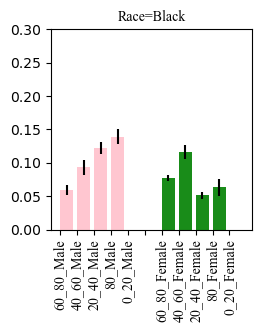

In [20]:
#Fixing random state for reproducibility

np.random.seed(19680801)
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(2.6,2.6))
fontsize = 10

# ======================= Results are calculated FPR_FNR_NF_Confidence_CheXpert.ipynb ===============================


sex = ('60_80_Male','40_60_Male','20_40_Male','80_Male','0_20_Male','','60_80_Female', '40_60_Female','20_40_Female',
       '80_Female', '0_20_Female')
sex_pos = np.arange(len(sex))

FPR =   (FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='BLACK/AFRICAN AMERICAN','FPR_60_80_M'].tolist()[0],
         FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='BLACK/AFRICAN AMERICAN','FPR_40_60_M'].tolist()[0],
         FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='BLACK/AFRICAN AMERICAN','FPR_20_40_M'].tolist()[0],
         FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='BLACK/AFRICAN AMERICAN','FPR_80+_M'].tolist()[0],
         FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='BLACK/AFRICAN AMERICAN','FPR_0_20_M'].tolist()[0],np.NAN,

         FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='BLACK/AFRICAN AMERICAN','FPR_60_80_F'].tolist()[0],
         FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='BLACK/AFRICAN AMERICAN','FPR_40_60_F'].tolist()[0],
         FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='BLACK/AFRICAN AMERICAN','FPR_20_40_F'].tolist()[0],
         FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='BLACK/AFRICAN AMERICAN','FPR_80+_F'].tolist()[0],
         FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='BLACK/AFRICAN AMERICAN','FPR_0_20_F'].tolist()[0])

error=[
    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='BLACK/AFRICAN AMERICAN','CI_FPR_60_80_M'].tolist()[0],
    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='BLACK/AFRICAN AMERICAN','CI_FPR_40_60_M'].tolist()[0],
    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='BLACK/AFRICAN AMERICAN','CI_FPR_20_40_M'].tolist()[0],
    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='BLACK/AFRICAN AMERICAN','CI_FPR_80+_M'].tolist()[0],
    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='BLACK/AFRICAN AMERICAN','CI_FPR_0_20_M'].tolist()[0],np.NAN,

    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='BLACK/AFRICAN AMERICAN','CI_FPR_60_80_F'].tolist()[0],
    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='BLACK/AFRICAN AMERICAN','CI_FPR_40_60_F'].tolist()[0],
    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='BLACK/AFRICAN AMERICAN','CI_FPR_20_40_F'].tolist()[0],
    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='BLACK/AFRICAN AMERICAN','CI_FPR_80+_F'].tolist()[0],
    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='BLACK/AFRICAN AMERICAN','CI_FPR_0_20_F'].tolist()[0]]

color = ['pink','pink','pink','pink','pink','white','green','green','green','green','green']

ax.bar(sex_pos, FPR, yerr=error, align='edge',color=color,alpha=0.9)

labels =['60_80_Male','40_60_Male','20_40_Male','80_Male','0_20_Male','','60_80_Female', '40_60_Female','20_40_Female',
       '80_Female', '0_20_Female']

x_pos = np.arange(len(labels))
ax.set_ylim(top=0.3)
ax.set_xticks(x_pos)
ax.set_xticklabels(labels,rotation=90,fontsize=fontsize,fontname='Times New Roman')
ax.set_title('Race=Black',fontsize=fontsize,fontname='Times New Roman')


plt.savefig(three_group_FPR+'Black_vs_other.pdf',bbox_inches='tight')


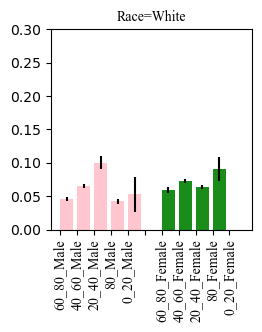

In [21]:
#Fixing random state for reproducibility
np.random.seed(19680801)
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(2.6,2.6))
fontsize = 10

sex = ('60_80_Male','40_60_Male','20_40_Male','80_Male','0_20_Male','','60_80_Female', '40_60_Female','20_40_Female',
       '80_Female', '0_20_Female')
sex_pos = np.arange(len(sex))

FPR =   (FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='WHITE','FPR_60_80_M'].tolist()[0],
         FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='WHITE','FPR_40_60_M'].tolist()[0],
         FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='WHITE','FPR_20_40_M'].tolist()[0],
         FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='WHITE','FPR_80+_M'].tolist()[0],
         FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='WHITE','FPR_0_20_M'].tolist()[0],np.NAN,

         FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='WHITE','FPR_60_80_F'].tolist()[0],
         FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='WHITE','FPR_40_60_F'].tolist()[0],
         FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='WHITE','FPR_20_40_F'].tolist()[0],
         FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='WHITE','FPR_80+_F'].tolist()[0],
         FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='WHITE','FPR_0_20_F'].tolist()[0])

error=[
    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='WHITE','CI_FPR_60_80_M'].tolist()[0],
    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='WHITE','CI_FPR_40_60_M'].tolist()[0],
    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='WHITE','CI_FPR_20_40_M'].tolist()[0],
    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='WHITE','CI_FPR_80+_M'].tolist()[0],
    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='WHITE','CI_FPR_0_20_M'].tolist()[0],np.NAN,

    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='WHITE','CI_FPR_60_80_F'].tolist()[0],
    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='WHITE','CI_FPR_40_60_F'].tolist()[0],
    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='WHITE','CI_FPR_20_40_F'].tolist()[0],
    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='WHITE','CI_FPR_80+_F'].tolist()[0],
    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='WHITE','CI_FPR_0_20_F'].tolist()[0]]

color = ['pink','pink','pink','pink','pink','white','green','green','green','green','green']

ax.bar(sex_pos, FPR, yerr=error, align='edge',color=color,alpha=0.9)

labels =['60_80_Male','40_60_Male','20_40_Male','80_Male','0_20_Male','','60_80_Female', '40_60_Female','20_40_Female',
       '80_Female', '0_20_Female']

x_pos = np.arange(len(labels))
ax.set_xticks(x_pos)
ax.set_ylim(top=0.3)
ax.set_xticklabels(labels,rotation=90,fontsize=fontsize,fontname='Times New Roman')
ax.set_title('Race=White',fontsize=fontsize,fontname='Times New Roman')


plt.savefig(three_group_FPR+'White_vs_other.pdf',bbox_inches='tight')


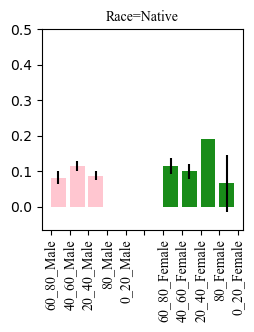

In [22]:
#Fixing random state for reproducibility
np.random.seed(19680801)
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(2.6,2.6))
fontsize = 10

sex = ('60_80_Male','40_60_Male','20_40_Male','80_Male','0_20_Male','','60_80_Female', '40_60_Female','20_40_Female',
       '80_Female', '0_20_Female')
sex_pos = np.arange(len(sex))

FPR =   (FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='AMERICAN INDIAN/ALASKA NATIVE','FPR_60_80_M'].tolist()[0],
         FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='AMERICAN INDIAN/ALASKA NATIVE','FPR_40_60_M'].tolist()[0],
         FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='AMERICAN INDIAN/ALASKA NATIVE','FPR_20_40_M'].tolist()[0],
        #  FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='AMERICAN INDIAN/ALASKA NATIVE','FPR_80+_M'].tolist()[0],
         np.NAN,
         np.NAN,
        FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='AMERICAN INDIAN/ALASKA NATIVE','FPR_0_20_M'].tolist()[0],
         FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='AMERICAN INDIAN/ALASKA NATIVE','FPR_60_80_F'].tolist()[0],
         FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='AMERICAN INDIAN/ALASKA NATIVE','FPR_40_60_F'].tolist()[0],
         FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='AMERICAN INDIAN/ALASKA NATIVE','FPR_20_40_F'].tolist()[0],
         FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='AMERICAN INDIAN/ALASKA NATIVE','FPR_80+_F'].tolist()[0],
        #  FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='AMERICAN INDIAN/ALASKA NATIVE','FPR_0_20_F'].tolist()[0]
         np.NAN
         )

error=[
    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='AMERICAN INDIAN/ALASKA NATIVE','CI_FPR_60_80_M'].tolist()[0],
    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='AMERICAN INDIAN/ALASKA NATIVE','CI_FPR_40_60_M'].tolist()[0],
    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='AMERICAN INDIAN/ALASKA NATIVE','CI_FPR_20_40_M'].tolist()[0],
    np.NAN,
    # FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='AMERICAN INDIAN/ALASKA NATIVE','CI_FPR_80+_M'].tolist()[0],
    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='AMERICAN INDIAN/ALASKA NATIVE','CI_FPR_0_20_M'].tolist()[0],
    # np.NAN,
    np.NAN,

    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='AMERICAN INDIAN/ALASKA NATIVE','CI_FPR_60_80_F'].tolist()[0],
    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='AMERICAN INDIAN/ALASKA NATIVE','CI_FPR_40_60_F'].tolist()[0],
    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='AMERICAN INDIAN/ALASKA NATIVE','CI_FPR_20_40_F'].tolist()[0],
    FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='AMERICAN INDIAN/ALASKA NATIVE','CI_FPR_80+_F'].tolist()[0],
    # FP_RaceAgeSex.loc[FP_RaceAgeSex['race']=='AMERICAN INDIAN/ALASKA NATIVE','CI_FPR_0_20_F'].tolist()[0]
    np.NAN

    ]

color = ['pink','pink','pink','pink','pink','white','green','green','green','green','green']

ax.bar(sex_pos, FPR, yerr=error, align='edge',color=color,alpha=0.9)

labels =['60_80_Male','40_60_Male','20_40_Male','80_Male','0_20_Male','','60_80_Female', '40_60_Female','20_40_Female',
       '80_Female', '0_20_Female']

x_pos = np.arange(len(labels))
ax.set_xticks(x_pos)
ax.set_ylim(top=0.5)
ax.set_xticklabels(labels,rotation=90,fontsize=fontsize,fontname='Times New Roman')
ax.set_title('Race=Native',fontsize=fontsize,fontname='Times New Roman')

plt.savefig(three_group_FPR+'Native_vs_other.pdf',bbox_inches='tight')